#**Network Slicing using Semisupervised Classification which is a Semi Supervised Learning Technique using Self-Training Method.**

**We will use Data Imputation for the Test Data to evalute model for a range of unknown data with new patterns.**

In [1]:
# Random Seed for Under-sampling, Data-split and Modeling
import random
#Under-sampling
a = random.randint(10, 99)
# a = 42

# Data-split labelled and unlabelled
b1 = random.randint(10, 99)
# b1 = 42

#Data-split train and test
b2 = 42

#Data Modeling
# c = 42

#Data-split labelled and unlabelled
Z = 0.001

undersampling = 'yes'
tsne = 'yes'

In [2]:
a

12

In [3]:
b1

53

# **Data Pre-processing**

### **Import Libraries**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
start_time_data_preprocessing = time.time()

### **Load Dataset**

In [7]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [8]:
data_backup = data
data_backup

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...,...
63162,63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,63166,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [9]:
data.columns.tolist()

['Unnamed: 0',
 'Use Case',
 'LTE/5g Category',
 'Technology Supported',
 'Day',
 'Time',
 'GBR',
 'Packet Loss Rate',
 'Packet delay',
 'slice Type']

In [10]:
data['LTE/5g Category'].value_counts()

,count
LTE/5g Category,
12,3024
11,3024
18,3024
17,3024
16,3024
15,3024
14,3024
13,3024
2,3024


In [11]:
data['Technology Supported'].value_counts()

,count
Technology Supported,
LTE/5G,33599
"IoT(LTE-M, NB-IoT)",29568


In [12]:
data = data.drop(data.columns[0], axis=1)
data

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.010000,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.010000,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.010000,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.010000,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...,...,...,...
63162,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,19,Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,20,Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,21,Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,22,"IoT(LTE-M, NB-IoT)",saturday,22,Non-GBR,0.000001,10,URLLC


In [13]:
data = data.drop(['LTE/5g Category','Day','Time'], axis=1)
data

,Use Case,Technology Supported,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
1,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
2,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
3,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
4,Smartphone,LTE/5G,Non-GBR,0.010000,100,eMBB
...,...,...,...,...,...,...
63162,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63163,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63164,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC
63165,Smart Transportation,"IoT(LTE-M, NB-IoT)",Non-GBR,0.000001,10,URLLC


### **Data Distribution by "Use Case"**

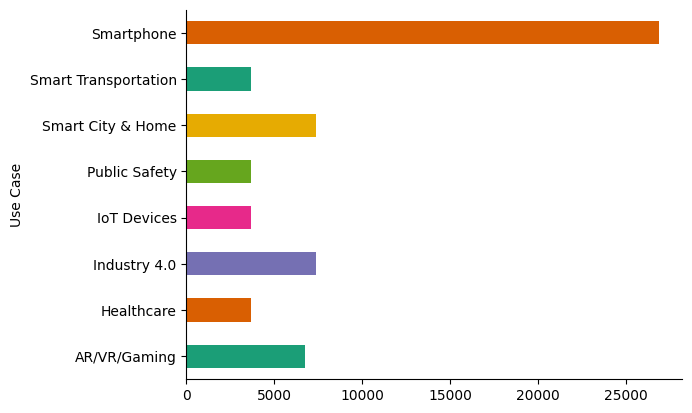

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Conversion of Feature Columns (Categorial to Numerical)**

using one-hot encoding

In [15]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Use Case', 'Technology Supported', 'GBR'])
one_hot_encoded_data

,Packet Loss Rate,Packet delay,slice Type,Use Case_AR/VR/Gaming,Use Case_Healthcare,Use Case_Industry 4.0,Use Case_IoT Devices,Use Case_Public Safety,Use Case_Smart City & Home,Use Case_Smart Transportation,Use Case_Smartphone,"Technology Supported_IoT(LTE-M, NB-IoT)",Technology Supported_LTE/5G,GBR_GBR,GBR_Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [16]:
data_ohe = one_hot_encoded_data.rename(columns={'Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data_ohe

,Packet Loss Rate,Packet delay,slice Type,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
1,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
2,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
3,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
4,0.010000,100,eMBB,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63163,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63164,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True
63165,0.000001,10,URLLC,False,False,False,False,False,False,True,False,True,False,False,True


In [17]:
data = data_ohe[['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]
data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
1,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
2,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
3,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
4,0.010000,100,False,True,False,True,False,False,False,False,False,False,False,True,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63163,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63164,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC
63165,0.000001,10,True,False,False,True,False,False,False,False,False,False,True,False,URLLC


In [18]:
# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ["IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data[column] = data[column].replace({False: 0, True: 1})

data

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
1,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
2,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
4,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63163,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63164,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC
63165,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,URLLC


### **Class Distribution Analysis**

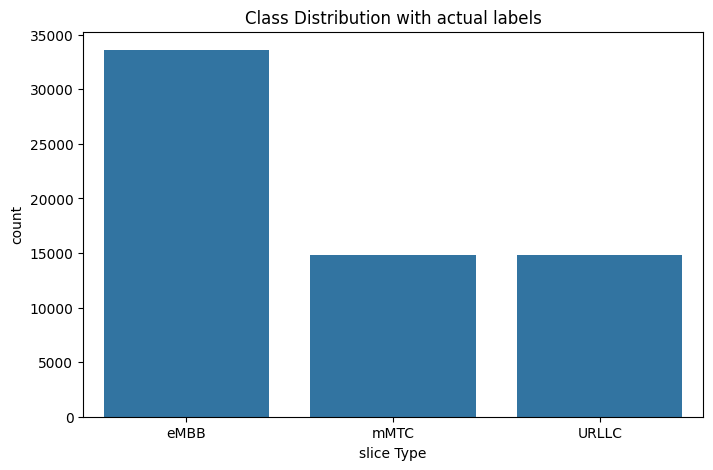

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

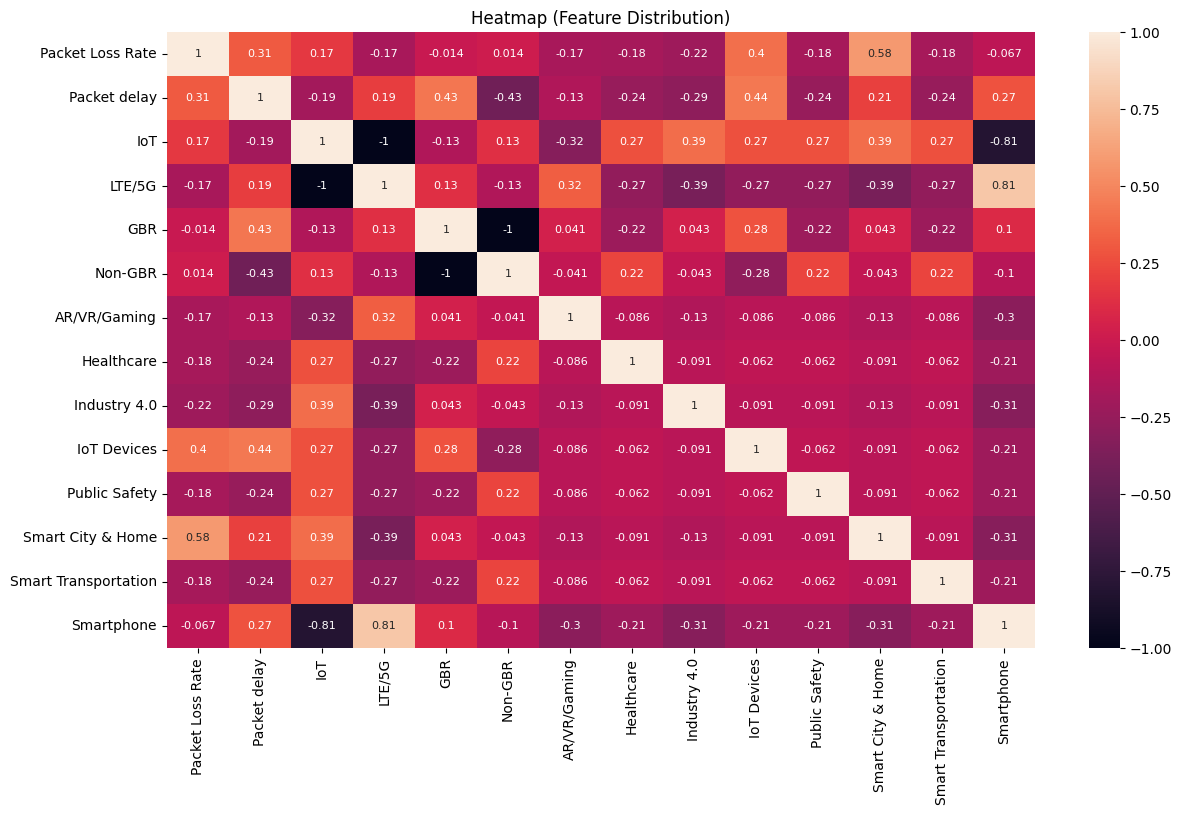

In [20]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

### **Relevant Feature Selection**

In [21]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

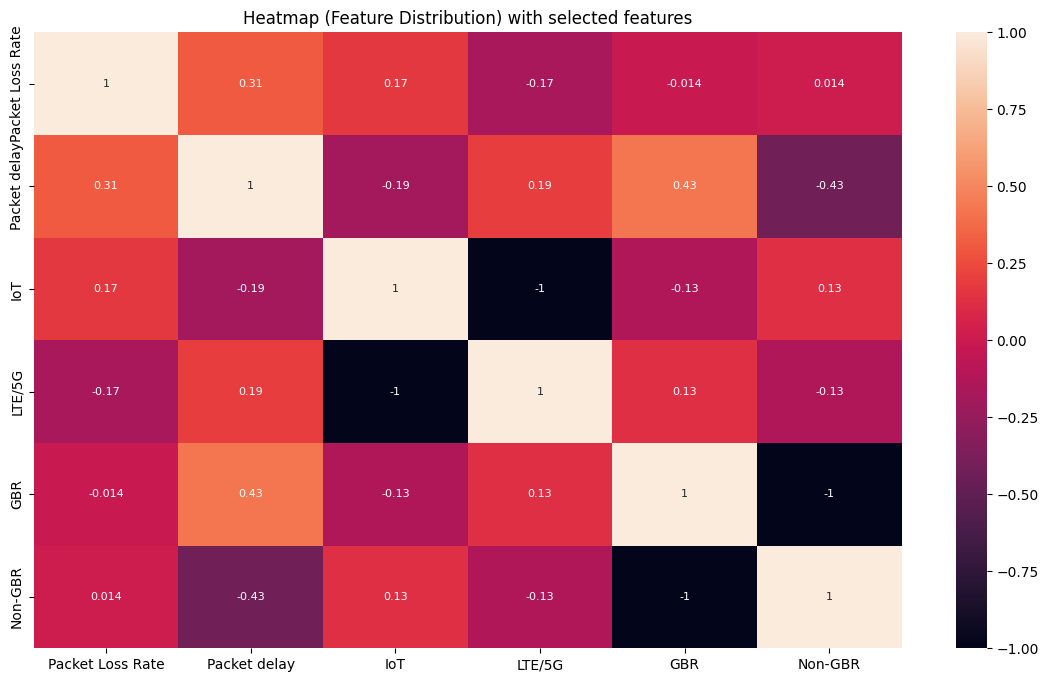

In [22]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

In [23]:
end_time_data_preprocessing = time.time()

# **Data Split**

### **Define X and y**

In [24]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [25]:
y = data['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
63162,URLLC
63163,URLLC
63164,URLLC
63165,URLLC


### **t-SNE - Dimensionality Reduction**

In [26]:
if tsne == 'yes':
  start_time_tsne = time.time()
  X_backup = X
  X_backup

  tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
  X_tsne = tsne.fit_transform(X)
  X_tsne

  X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
  X

  data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
  data

  features = ['Feature 1', 'Feature 2']
  end_time_tsne = time.time()

In [27]:
# X_backup = X
# X_backup

In [28]:
# tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
# X_tsne = tsne.fit_transform(X)
# X_tsne

In [29]:
# X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
# X

#### Pair Plots

In [30]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [31]:
# data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
# data

In [32]:
# features = ['Feature 1', 'Feature 2']

### **Define Unlabelled and Labelled Dataset**

In [33]:
print(b1)
print(Z)

53
0.001


In [34]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=Z, random_state=b1)

In [35]:
X_labelled

,Feature 1,Feature 2
46413,-123.966156,-2.389992
3702,76.639557,189.082611
11948,11.780458,81.808334
892,13.224804,-124.999298
7990,99.299370,6.755680
...,...,...
46843,-123.966156,-2.389992
55717,132.817749,-111.010040
35701,132.817749,-111.010040
58141,-11.040947,-217.018219


In [36]:
X_unlabelled

,Feature 1,Feature 2
15564,206.162888,8.662295
7617,99.299370,6.755680
53208,132.817749,-111.010040
49061,-123.966156,-2.389992
17327,6.495858,-35.450062
...,...,...
53453,132.817749,-111.010040
12456,11.780458,81.808334
1608,13.224804,-124.999298
59615,-123.966156,-2.389992


# **Data Modelling and Analysis**

In [37]:
start_time_model_training = time.time()

## **Base Model Training**

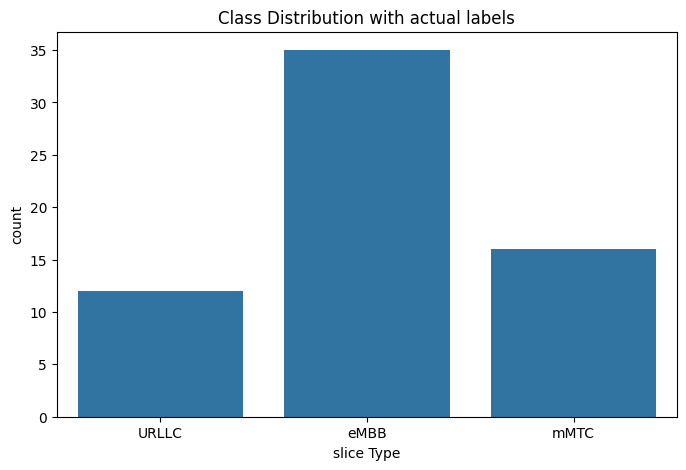

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_labelled)
plt.title('Class Distribution with actual labels')
plt.show()

### **Under Sampling - Class Imbalance Issue**

In [39]:
print(a)

12


Majority Class:  eMBB
Majority Class Count:  35
Minority Class Count:  12
Amount of Data to be removed:  23
Indices to be removed: 
 [15 28 27 31 44 46 54  2 42  5 56 18 32 47 16 36  1 19 57 53 25  8 34]


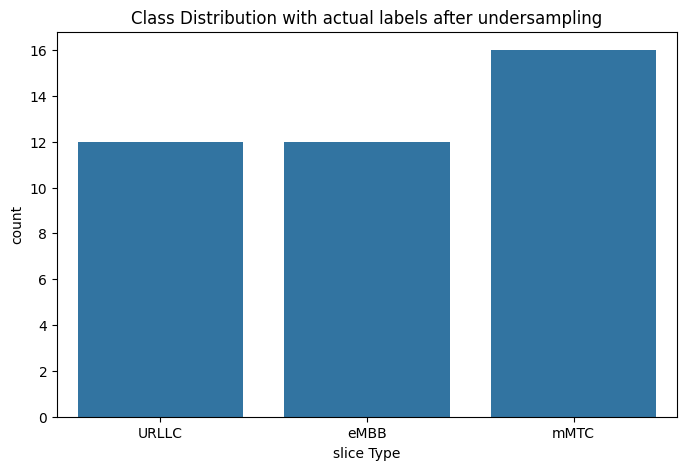

In [40]:
if undersampling == 'yes':
  start_time_undersampling = time.time()
  # Get the column names from the original DataFrame
  X_labelled_column_names = X_labelled.columns.tolist()
  X_labelled_column_names

  # Convert X_unlabelled to a pandas DataFrame
  X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
  X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

  # Resetting indices to avoid alignment issues
  X_labelled_with_labels.reset_index(drop=True, inplace=True)
  y_labelled.reset_index(drop=True, inplace=True)
  y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

  # Add y_test and y_pred columns to the DataFrame
  X_labelled_with_labels['slice Type'] = y_labelled

  X_labelled_with_labels

  # Identify the majority class
  majority_class = X_labelled_with_labels['slice Type'].value_counts().idxmax()
  print("Majority Class: ", majority_class)

  # Count the number of data points in the majority class
  majority_count = X_labelled_with_labels['slice Type'].value_counts()[majority_class]
  print("Majority Class Count: ", majority_count)

  # Count the number of data points in the other two classes
  minority_count = X_labelled_with_labels['slice Type'].value_counts().min()
  print("Minority Class Count: ", minority_count)

  # Calculate the number of data points to remove from the majority class
  num_to_remove = majority_count - minority_count
  print("Amount of Data to be removed: ", num_to_remove)

  # Randomly select data points from the majority class to remove
  majority_indices = X_labelled_with_labels[X_labelled_with_labels['slice Type'] == majority_class].index
  np.random.seed(a)
  remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
  print("Indices to be removed: \n", remove_indices[:100])

  # Remove the selected data points from the DataFrame
  balanced_data = X_labelled_with_labels.drop(remove_indices)

  balanced_data = balanced_data.reset_index(drop=True)
  balanced_data

  X_labelled = balanced_data[features]
  X_labelled

  y_labelled = balanced_data['slice Type']
  y_labelled

  end_time_undersampling = time.time()

  plt.figure(figsize=(8, 5))
  sns.countplot(x=balanced_data['slice Type'])
  plt.title('Class Distribution with actual labels after undersampling')
  plt.show()

In [41]:
# # Get the column names from the original DataFrame
# X_labelled_column_names = X_labelled.columns.tolist()
# X_labelled_column_names

In [42]:
# # Convert X_unlabelled to a pandas DataFrame
# X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
# X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_labelled_with_labels.reset_index(drop=True, inplace=True)
# y_labelled.reset_index(drop=True, inplace=True)
# y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_labelled_with_labels['slice Type'] = y_labelled

# X_labelled_with_labels

In [43]:
# # Identify the majority class
# majority_class = X_labelled_with_labels['slice Type'].value_counts().idxmax()
# print("Majority Class: ", majority_class)

# # Count the number of data points in the majority class
# majority_count = X_labelled_with_labels['slice Type'].value_counts()[majority_class]
# print("Majority Class Count: ", majority_count)

# # Count the number of data points in the other two classes
# minority_count = X_labelled_with_labels['slice Type'].value_counts().min()
# print("Minority Class Count: ", minority_count)

# # Calculate the number of data points to remove from the majority class
# num_to_remove = majority_count - minority_count
# print("Amount of Data to be removed: ", num_to_remove)

# # Randomly select data points from the majority class to remove
# majority_indices = X_labelled_with_labels[X_labelled_with_labels['slice Type'] == majority_class].index
# np.random.seed(a)
# remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
# print("Indices to be removed: \n", remove_indices[:100])

# # Remove the selected data points from the DataFrame
# balanced_data = X_labelled_with_labels.drop(remove_indices)

In [44]:
# balanced_data = balanced_data.reset_index(drop=True)
# balanced_data

In [45]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=balanced_data['slice Type'])
# plt.title('Class Distribution with actual labels after undersampling')
# plt.show()

In [46]:
# plt.figure(figsize=(8, 5))
# sns.countplot(x=balanced_data['slice Type'])
# # plt.title('Balanced Class Distribution with actual labels')
# plt.xlabel('Slice Type')
# plt.ylabel('Data Count')
# plt.show()

In [47]:
# X_labelled = balanced_data[features]
# X_labelled

In [48]:
# y_labelled = balanced_data['slice Type']
# y_labelled

### **Training**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_RFC_base = RandomForestClassifier()
model_RFC_base.fit(X_labelled, y_labelled)

RandomForestClassifier()

## **Pseudo Label Creation**

In [51]:
pseudo_labels = model_RFC_base.predict(X_unlabelled)

In [52]:
accuracy_RFC = accuracy_score(y_unlabelled, pseudo_labels)
print(f"Accuracy: {accuracy_RFC:.2f}")

Accuracy: 0.95


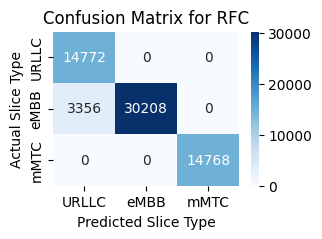

In [53]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_unlabelled, pseudo_labels)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

## **New Dataset Creation**

In [54]:
# Get the column names from the original DataFrame
X_unlabelled_column_names = X_unlabelled.columns.tolist()
X_unlabelled_column_names

['Feature 1', 'Feature 2']

In [55]:
# Convert X_unlabelled to a pandas DataFrame
X_unlabelled_df_RFC = pd.DataFrame(X_unlabelled, columns=X_unlabelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_unlabelled_with_pseudo_labels_RFC = X_unlabelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_unlabelled_with_pseudo_labels_RFC.reset_index(drop=True, inplace=True)
# pseudo_labels.reset_index(drop=True, inplace=True)
pseudo_labels = pd.Series(pseudo_labels, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_unlabelled_with_pseudo_labels_RFC['slice Type'] = pseudo_labels

X_unlabelled_with_pseudo_labels_RFC

,Feature 1,Feature 2,slice Type
0,206.162888,8.662295,eMBB
1,99.299370,6.755680,eMBB
2,132.817749,-111.010040,mMTC
3,-123.966156,-2.389992,URLLC
4,6.495858,-35.450062,eMBB
...,...,...,...
63099,132.817749,-111.010040,mMTC
63100,11.780458,81.808334,eMBB
63101,13.224804,-124.999298,eMBB
63102,-123.966156,-2.389992,URLLC


In [56]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Feature 1', 'Feature 2']

In [57]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df_RFC = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_labelled_with_labels_RFC = X_labelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_labelled_with_labels_RFC.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_labelled_with_labels_RFC['slice Type'] = y_labelled

X_labelled_with_labels_RFC

,Feature 1,Feature 2,slice Type
0,-123.966156,-2.389992,URLLC
1,13.224804,-124.999298,eMBB
2,99.299370,6.755680,eMBB
3,132.817749,-111.010040,mMTC
4,-123.966156,-2.389992,URLLC
5,132.817749,-111.010040,mMTC
6,-115.037819,-147.597336,mMTC
7,-123.966156,-2.389992,URLLC
8,-115.037819,-147.597336,mMTC
9,11.780458,81.808334,eMBB


In [58]:
data_new = pd.concat([X_labelled_with_labels_RFC, X_unlabelled_with_pseudo_labels_RFC], ignore_index=True)
# data_new = data_new.dropna()
data_new

,Feature 1,Feature 2,slice Type
0,-123.966156,-2.389992,URLLC
1,13.224804,-124.999298,eMBB
2,99.299370,6.755680,eMBB
3,132.817749,-111.010040,mMTC
4,-123.966156,-2.389992,URLLC
...,...,...,...
63139,132.817749,-111.010040,mMTC
63140,11.780458,81.808334,eMBB
63141,13.224804,-124.999298,eMBB
63142,-123.966156,-2.389992,URLLC


### **New Classifier Model Training**

In [59]:
print(b2)

42


In [60]:
X = data_new[features]
X

,Feature 1,Feature 2
0,-123.966156,-2.389992
1,13.224804,-124.999298
2,99.299370,6.755680
3,132.817749,-111.010040
4,-123.966156,-2.389992
...,...,...
63139,132.817749,-111.010040
63140,11.780458,81.808334
63141,13.224804,-124.999298
63142,-123.966156,-2.389992


In [61]:
y = data_new['slice Type']
y

,slice Type
0,URLLC
1,eMBB
2,eMBB
3,mMTC
4,URLLC
...,...
63139,mMTC
63140,eMBB
63141,eMBB
63142,URLLC


In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=b2)
X_train

,Feature 1,Feature 2
6526,-123.966156,-2.389992
50496,-123.966156,-2.389992
32012,132.817749,-111.010040
42910,76.639557,189.082611
24443,132.817749,-111.010040
...,...,...
62570,11.780458,81.808334
38158,13.224804,-124.999298
860,-40.638390,193.148438
15795,-123.966156,-2.389992


In [63]:
X_test

,Feature 1,Feature 2
33524,-115.037819,-147.597336
18222,11.780458,81.808334
53857,11.780458,81.808334
55494,11.780458,81.808334
53935,13.224804,-124.999298
...,...,...
20574,13.224804,-124.999298
51335,-115.037819,-147.597336
43767,6.495858,-35.450062
60145,11.780458,81.808334


In [64]:
model_RFC_new = RandomForestClassifier()
model_RFC_new.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
end_time_model_training = time.time()

# **Model Testing**

## **Data Imputation**

In [66]:
X_test

,Feature 1,Feature 2
33524,-115.037819,-147.597336
18222,11.780458,81.808334
53857,11.780458,81.808334
55494,11.780458,81.808334
53935,13.224804,-124.999298
...,...,...
20574,13.224804,-124.999298
51335,-115.037819,-147.597336
43767,6.495858,-35.450062
60145,11.780458,81.808334


In [67]:
y_test

,slice Type
33524,mMTC
18222,eMBB
53857,eMBB
55494,eMBB
53935,eMBB
...,...
20574,eMBB
51335,mMTC
43767,eMBB
60145,eMBB


In [68]:
# Get the column names from the original DataFrame
# X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
test_data = X_test.copy()

# Resetting indices to avoid alignment issues
test_data.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')

# Include the 'predicted labels' as a new column in the DataFrame
test_data['actual_label'] = actual_label
test_data

,Feature 1,Feature 2,actual_label
0,-115.037819,-147.597336,mMTC
1,11.780458,81.808334,eMBB
2,11.780458,81.808334,eMBB
3,11.780458,81.808334,eMBB
4,13.224804,-124.999298,eMBB
...,...,...,...
6310,13.224804,-124.999298,eMBB
6311,-115.037819,-147.597336,mMTC
6312,6.495858,-35.450062,eMBB
6313,11.780458,81.808334,eMBB


In [69]:
test_data_eMBB = pd.DataFrame(columns=test_data.columns)
test_data_mMTC = pd.DataFrame(columns=test_data.columns)
test_data_URLLC = pd.DataFrame(columns=test_data.columns)

In [70]:
test_data_eMBB

,Feature 1,Feature 2,actual_label


In [71]:
test_data_mMTC

,Feature 1,Feature 2,actual_label


In [72]:
test_data_URLLC

,Feature 1,Feature 2,actual_label


In [73]:
# Extract 3 dataframes for each slice type
test_data_eMBB = test_data.loc[test_data['actual_label'] == 'eMBB']
test_data_mMTC = test_data.loc[test_data['actual_label'] == 'mMTC']
test_data_URLLC = test_data.loc[test_data['actual_label'] == 'URLLC']

In [74]:
test_data_eMBB

,Feature 1,Feature 2,actual_label
1,11.780458,81.808334,eMBB
2,11.780458,81.808334,eMBB
3,11.780458,81.808334,eMBB
4,13.224804,-124.999298,eMBB
8,99.299370,6.755680,eMBB
...,...,...,...
6304,11.780458,81.808334,eMBB
6308,99.299370,6.755680,eMBB
6310,13.224804,-124.999298,eMBB
6312,6.495858,-35.450062,eMBB


In [75]:
print(test_data_eMBB['actual_label'].unique())
if 'Feature 1' in test_data_eMBB.columns:
  print(test_data_eMBB['Feature 1'].unique())
  print(test_data_eMBB['Feature 2'].unique())

['eMBB']
[ 11.780458   13.224804   99.29937   206.16289   -40.63839   150.75894
   6.4958577  76.63956  ]
[  81.808334 -124.9993      6.75568     8.662295  193.14844   108.31397
  -35.45006   189.08261 ]


In [76]:
if 'Feature 1' in test_data_eMBB.columns:
  print(test_data_eMBB['Feature 1'].min())
  print(test_data_eMBB['Feature 1'].max())
  print(test_data_eMBB['Feature 2'].min())
  print(test_data_eMBB['Feature 2'].max())
else:
  print(test_data_eMBB['Packet Loss Rate'].min())
  print(test_data_eMBB['Packet Loss Rate'].max())
  print(test_data_eMBB['Packet delay'].min())
  print(test_data_eMBB['Packet delay'].max())

-40.63839
206.16289
-124.9993
193.14844


In [77]:
test_data_mMTC

,Feature 1,Feature 2,actual_label
0,-115.037819,-147.597336,mMTC
5,132.817749,-111.010040,mMTC
7,132.817749,-111.010040,mMTC
10,132.817749,-111.010040,mMTC
13,-11.040947,-217.018219,mMTC
...,...,...,...
6306,-11.040947,-217.018219,mMTC
6307,132.817749,-111.010040,mMTC
6309,132.817749,-111.010040,mMTC
6311,-115.037819,-147.597336,mMTC


In [78]:
print(test_data_mMTC['actual_label'].unique())
if 'Feature 1' in test_data_mMTC.columns:
  print(test_data_mMTC['Feature 1'].unique())
  print(test_data_mMTC['Feature 2'].unique())

['mMTC']
[-115.03782   132.81775   -11.040947]
[-147.59734 -111.01004 -217.01822]


In [79]:
if 'Feature 1' in test_data_mMTC.columns:
  print(test_data_mMTC['Feature 1'].min())
  print(test_data_mMTC['Feature 1'].max())
  print(test_data_mMTC['Feature 2'].min())
  print(test_data_mMTC['Feature 2'].max())
else:
  print(test_data_mMTC['Packet Loss Rate'].min())
  print(test_data_mMTC['Packet Loss Rate'].max())
  print(test_data_mMTC['Packet delay'].min())
  print(test_data_mMTC['Packet delay'].max())

-115.03782
132.81775
-217.01822
-111.01004


In [80]:
test_data_URLLC

,Feature 1,Feature 2,actual_label
6,-123.966156,-2.389992,URLLC
11,-139.593002,141.917740,URLLC
12,-123.966156,-2.389992,URLLC
14,-123.966156,-2.389992,URLLC
21,-139.593002,141.917740,URLLC
...,...,...,...
6287,-123.966156,-2.389992,URLLC
6293,-123.966156,-2.389992,URLLC
6294,-123.966156,-2.389992,URLLC
6298,-123.966156,-2.389992,URLLC


In [81]:
print(test_data_URLLC['actual_label'].unique())
if 'Feature 1' in test_data_URLLC.columns:
  print(test_data_URLLC['Feature 1'].unique())
  print(test_data_URLLC['Feature 2'].unique())

['URLLC']
[-123.966156 -139.593   ]
[ -2.3899918 141.91774  ]


In [82]:
if 'Feature 1' in test_data_URLLC.columns:
  print(test_data_URLLC['Feature 1'].min())
  print(test_data_URLLC['Feature 1'].max())
  print(test_data_URLLC['Feature 2'].min())
  print(test_data_URLLC['Feature 2'].max())
else:
  print(test_data_URLLC['Packet Loss Rate'].min())
  print(test_data_URLLC['Packet Loss Rate'].max())
  print(test_data_URLLC['Packet delay'].min())
  print(test_data_URLLC['Packet delay'].max())

-139.593
-123.966156
-2.3899918
141.91774


In [83]:
test_data_eMBB_new = pd.DataFrame(columns=test_data_eMBB.columns)
# test_data_eMBB_new.drop('actual_label', axis=1, inplace=True)
test_data_eMBB_new

,Feature 1,Feature 2,actual_label


In [84]:
test_data_mMTC_new = pd.DataFrame(columns=test_data_URLLC.columns)
# test_data_mMTC_new.drop('actual_label', axis=1, inplace=True)
test_data_mMTC_new

,Feature 1,Feature 2,actual_label


In [85]:
test_data_URLLC_new = pd.DataFrame(columns=test_data_URLLC.columns)
# test_data_URLLC_new.drop('actual_label', axis=1, inplace=True)
test_data_URLLC_new

,Feature 1,Feature 2,actual_label


In [86]:
# for i in range(1000):
#   iot = random.randint(0,1)
#   lte_5g = 1 - iot

#   gbr = random.randint(0,1)
#   non_gbr = 1 - gbr

#   test_data_eMBB_new.loc[i] = [random.uniform(test_data_eMBB['Packet Loss Rate'].min(), test_data_eMBB['Packet Loss Rate'].max()), random.uniform(test_data_eMBB['Packet delay'].min(), test_data_eMBB['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'eMBB']  # Adding a new row to eMBB
#   test_data_mMTC_new.loc[i] = [random.uniform(test_data_URLLC['Packet Loss Rate'].min(), test_data_URLLC['Packet Loss Rate'].max()), random.uniform(test_data_URLLC['Packet delay'].min(), test_data_URLLC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'mMTC']  # Adding a new row to mMTC
#   test_data_URLLC_new.loc[i] = [random.uniform(test_data_URLLC['Packet Loss Rate'].min(), test_data_URLLC['Packet Loss Rate'].max()), random.uniform(test_data_URLLC['Packet delay'].min(), test_data_URLLC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'URLLC']  # Adding a new row to URLLC


In [87]:
for i in range(1000):
  if 'Feature 1' in test_data_eMBB_new.columns:
      test_data_eMBB_new.loc[i] = [random.choice(test_data_eMBB['Feature 1'].unique()), random.choice(test_data_eMBB['Feature 2'].unique()),'eMBB']  # Adding a new row to eMBB
      test_data_mMTC_new.loc[i] = [random.choice(test_data_mMTC['Feature 1'].unique()), random.choice(test_data_mMTC['Feature 2'].unique()), 'mMTC']  # Adding a new row to mMTC
      test_data_URLLC_new.loc[i] = [random.choice(test_data_URLLC['Feature 1'].unique()), random.choice(test_data_URLLC['Feature 2'].unique()), 'URLLC']  # Adding a new row to URLLC
  else:
      iot = random.randint(0,1)
      lte_5g = 1 - iot

      gbr = random.randint(0,1)
      non_gbr = 1 - gbr

      test_data_eMBB_new.loc[i] = [random.uniform(test_data_eMBB['Packet Loss Rate'].min(), test_data_eMBB['Packet Loss Rate'].max()), random.uniform(test_data_eMBB['Packet delay'].min(), test_data_eMBB['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'eMBB']  # Adding a new row to eMBB
      test_data_mMTC_new.loc[i] = [random.uniform(test_data_mMTC['Packet Loss Rate'].min(), test_data_mMTC['Packet Loss Rate'].max()), random.uniform(test_data_mMTC['Packet delay'].min(), test_data_mMTC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'mMTC']  # Adding a new row to mMTC
      test_data_URLLC_new.loc[i] = [random.uniform(test_data_URLLC['Packet Loss Rate'].min(), test_data_URLLC['Packet Loss Rate'].max()), random.uniform(test_data_URLLC['Packet delay'].min(), test_data_URLLC['Packet delay'].max()), iot, lte_5g, gbr, non_gbr, 'URLLC']  # Adding a new row to URLLC


In [88]:
test_data_eMBB_new

,Feature 1,Feature 2,actual_label
0,11.780458,193.148438,eMBB
1,-40.638390,193.148438,eMBB
2,150.758942,-124.999298,eMBB
3,76.639557,81.808334,eMBB
4,-40.638390,6.755680,eMBB
...,...,...,...
995,13.224804,-35.450062,eMBB
996,11.780458,8.662295,eMBB
997,150.758942,8.662295,eMBB
998,76.639557,193.148438,eMBB


In [89]:
test_data_mMTC_new

,Feature 1,Feature 2,actual_label
0,-11.040947,-217.018219,mMTC
1,-115.037819,-147.597336,mMTC
2,132.817749,-111.010040,mMTC
3,-11.040947,-217.018219,mMTC
4,-11.040947,-111.010040,mMTC
...,...,...,...
995,-11.040947,-147.597336,mMTC
996,132.817749,-111.010040,mMTC
997,-11.040947,-217.018219,mMTC
998,-11.040947,-111.010040,mMTC


In [90]:
test_data_URLLC_new

,Feature 1,Feature 2,actual_label
0,-139.593002,-2.389992,URLLC
1,-123.966156,141.917740,URLLC
2,-139.593002,141.917740,URLLC
3,-123.966156,141.917740,URLLC
4,-123.966156,141.917740,URLLC
...,...,...,...
995,-139.593002,-2.389992,URLLC
996,-139.593002,-2.389992,URLLC
997,-123.966156,141.917740,URLLC
998,-139.593002,-2.389992,URLLC


In [91]:
test_data_new = pd.DataFrame(columns=X_test.columns)
test_data_new

,Feature 1,Feature 2


In [92]:
# Concatenate the DataFrames
test_data_new = pd.concat([test_data_eMBB_new, test_data_mMTC_new, test_data_URLLC_new], ignore_index=True)
test_data_new

,Feature 1,Feature 2,actual_label
0,11.780458,193.148438,eMBB
1,-40.638390,193.148438,eMBB
2,150.758942,-124.999298,eMBB
3,76.639557,81.808334,eMBB
4,-40.638390,6.755680,eMBB
...,...,...,...
2995,-139.593002,-2.389992,URLLC
2996,-139.593002,-2.389992,URLLC
2997,-123.966156,141.917740,URLLC
2998,-139.593002,-2.389992,URLLC


In [93]:
# Ensure that the specific columns are of type integer
if 'Feature 1' not in test_data_new.columns:
  test_data_new['IoT'] = test_data_new['IoT'].astype(int)
  test_data_new['LTE/5G'] = test_data_new['LTE/5G'].astype(int)
  test_data_new['GBR'] = test_data_new['GBR'].astype(int)
  test_data_new['Non-GBR'] = test_data_new['Non-GBR'].astype(int)
  test_data_new.reset_index(drop=True, inplace=True)
  test_data_new

In [94]:
X_test_new = test_data_new[features]
X_test_new

,Feature 1,Feature 2
0,11.780458,193.148438
1,-40.638390,193.148438
2,150.758942,-124.999298
3,76.639557,81.808334
4,-40.638390,6.755680
...,...,...
2995,-139.593002,-2.389992
2996,-139.593002,-2.389992
2997,-123.966156,141.917740
2998,-139.593002,-2.389992


In [95]:
y_test_new = test_data_new['actual_label']
y_test_new

,actual_label
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
2995,URLLC
2996,URLLC
2997,URLLC
2998,URLLC


## **Slice Prediction**

In [96]:
# Predict the labels for the test data
y_pred = model_RFC_new.predict(X_test_new)
y_pred = pd.Series(y_pred, name='predicted_label')
y_pred

,predicted_label
0,eMBB
1,eMBB
2,eMBB
3,eMBB
4,eMBB
...,...
2995,URLLC
2996,URLLC
2997,URLLC
2998,URLLC


## **Update new testing dataset with labels**

In [97]:
# Get the column names from the original DataFrame
# X_test_column_names = X_test_new.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test_new.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test_new.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test_new, name='actual_label')
predicted_label = pd.Series(y_pred, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [98]:
# Display the Updated Table
X_test_with_labels

,Feature 1,Feature 2,actual_label,predicted_label
0,11.780458,193.148438,eMBB,eMBB
1,-40.638390,193.148438,eMBB,eMBB
2,150.758942,-124.999298,eMBB,eMBB
3,76.639557,81.808334,eMBB,eMBB
4,-40.638390,6.755680,eMBB,eMBB
...,...,...,...,...
2995,-139.593002,-2.389992,URLLC,URLLC
2996,-139.593002,-2.389992,URLLC,URLLC
2997,-123.966156,141.917740,URLLC,URLLC
2998,-139.593002,-2.389992,URLLC,URLLC


## **Predicted Label Analysis**

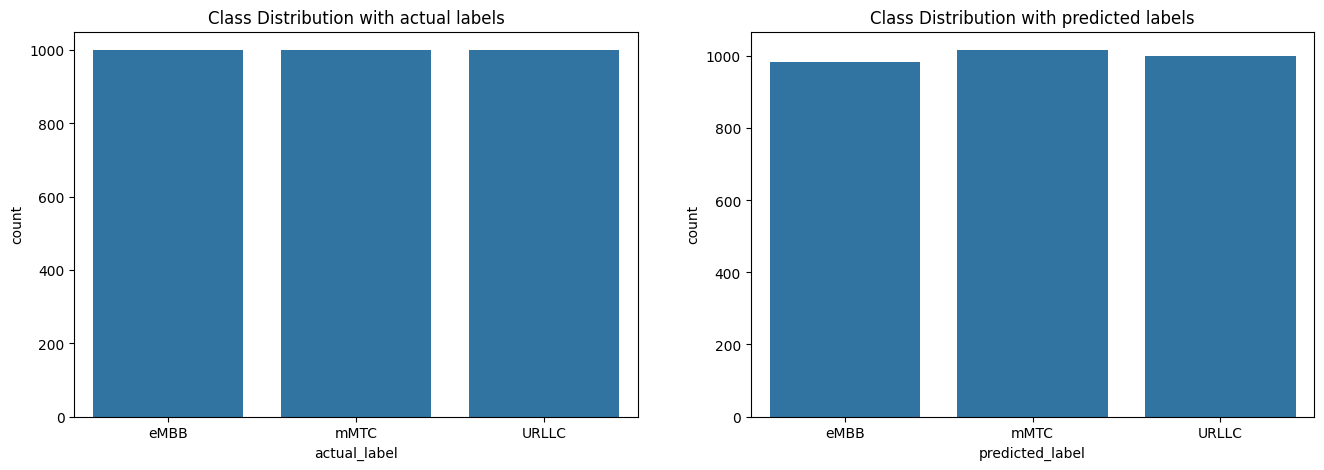

In [99]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

### **Confusion Matrix**

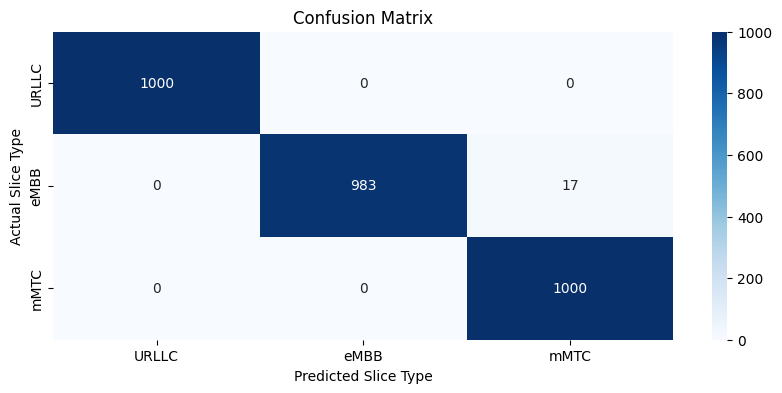


 12 53
0.001 40


In [100]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
print("\n", a, b1)
print(Z, len(X_labelled))

In [101]:
# Calculate accuracy
accuracy = accuracy_score(actual_label, predicted_label)
print("Accuracy", accuracy)

# Calculate precision
precision = precision_score(actual_label, predicted_label, average='weighted')
print("Precision", precision)

# Calculate recall
recall = recall_score(actual_label, predicted_label, average='weighted')
print("Recall", recall)

# Calculate F1-score
f1score = f1_score(actual_label, predicted_label, average='weighted')
print("F1-score", f1score)

Accuracy 0.9943333333333333
Precision 0.9944280563749589
Recall 0.9943333333333333
F1-score 0.994332923887084


In [102]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 0.9831340657539627


In [103]:
response_time_data_preprocessing = end_time_data_preprocessing - start_time_data_preprocessing
print("response_time_data_preprocessing", response_time_data_preprocessing)

response_time_tsne = end_time_tsne - start_time_tsne
print("response_time_tsne", response_time_tsne)

response_time_undersampling = end_time_undersampling - start_time_undersampling
print("response_time_undersampling", response_time_undersampling)

response_time_model_training = end_time_model_training - start_time_model_training
print("response_time_model_training", response_time_model_training)

response_time_data_preprocessing 11.12816858291626
response_time_tsne 309.7221736907959
response_time_undersampling 0.006893634796142578
response_time_model_training 3.4812653064727783


In [104]:
# # Calculate the Silhouette Score
# silhouette_score_test = silhouette_score(X_test, predicted_label)

# # Print or use the Silhouette Score for evaluation
# print("Silhouette Score:", silhouette_score_test)

In [105]:
# # Calculate Davies-Bouldin Index
# db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# # Print or use the DBI for evaluation
# print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

In [106]:
import pandas as pd
import os

# Data for the new row
new_data = {
    "Under-sampling": a,
     "Data-split labelled and unlabelled": b1,
     "Accuracy": accuracy,
     "Precision": precision,
     "Recall": recall,
     "F1-Score": f1score,
     "ARI": ar_index_test,
     "response_time_data_preprocessing": response_time_data_preprocessing,
     "response_time_tsne": response_time_tsne,
     "response_time_undersampling": response_time_undersampling,
     "response_time_model_training": response_time_model_training
}


# Convert to DataFrame
df_new = pd.DataFrame([new_data])

# File path
file_path = "/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Results/exp11_performance_metrics5.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Append new data to the existing CSV file
    df_new.to_csv(file_path, mode='a', header=False, index=False)
else:
    # Write a new CSV file with the new data
    df_new.to_csv(file_path, mode='w', header=True, index=False)

print(f"New data has been appended to '{file_path}'")

New data has been appended to '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Results/exp11_performance_metrics5.csv'


In [107]:
data_check = pd.read_csv('/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Results/exp11_performance_metrics5.csv')
data_check

,Under-sampling,Data-split labelled and unlabelled,Accuracy,Precision,Recall,F1-Score,ARI,response_time_data_preprocessing,response_time_tsne,response_time_undersampling,response_time_model_training
0,91,53,0.972667,0.973895,0.972667,0.972397,0.920667,10.264861,309.318963,0.006259,3.649623
1,50,17,0.985333,0.985951,0.985333,0.985326,0.956953,8.819672,309.169735,0.007458,3.499204
2,75,66,0.980000,0.981132,0.980000,0.979982,0.941796,9.564170,305.689084,0.012877,3.552080
3,60,15,1.000000,1.000000,1.000000,1.000000,1.000000,7.299952,310.620228,0.019494,5.118209
4,78,44,1.000000,1.000000,1.000000,1.000000,1.000000,11.718384,308.342034,0.006441,3.556963
5,13,54,0.993667,0.993785,0.993667,0.993666,0.981169,10.570015,306.253514,0.010458,3.665723
6,78,27,1.000000,1.000000,1.000000,1.000000,1.000000,8.037861,308.767587,0.021723,4.882972
7,86,44,0.974667,0.975766,0.974667,0.974448,0.926318,10.724879,305.281162,0.016821,4.908241
8,76,43,1.000000,1.000000,1.000000,1.000000,1.000000,10.672107,305.575186,0.013810,4.285966
9,12,53,0.994333,0.994428,0.994333,0.994333,0.983134,11.128169,309.722174,0.006894,3.481265


# **SYNC NOTEBOOKS**

In [108]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp11 - NSI_SSL_undersampling_tsne_Data_Imputation.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'